# DATA SCIENCE USANDO DADOS DO CEAPS  

Neste trabalho usaremos um dataset coletado do portal do CEAPS (Cota para Exercício da Atividade Parlamentar dos Senadores). Nesse dataset temos informações a respeito dos gastos declarados dos senadores. O objetivo deste tralho é limpar e tratar os dados para, por fim, realizar análises que podem ser úteis para avaliar o gasto dos senadores.

1. Lendo o dataset e concatenado em um único Data Frame
2. Explorando o DATASET
3. DATA Cleaning
    - Limpando a coluna COD_DOCUMENTO
    - Limpando a coluna DATA
    - Limpando a coluna VALOR_REEMBOLSADO
    - Transformando a coluna DOCUMENTO em dados booleanos
    - Convertendo variáveis categóricas em variáveis dummies da coluna TIPO_DESPESA
    - Removendo as colunas que não participarão da análise dos dados

    


## 1. Lendo o dataset e concatenado em um único Data Frame

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Como o arquivo não abriu imediatamente com o método `read_csv` do pandas, de modo que houve um erro dizendo que o arquivo não poderia ser decodificado, então há a necessidade de determinar o  encoding do arquivo. Para isso, importaremos o `chardet.detect` e prosseguiremos da seguinte maneira:

In [2]:
import chardet
with open('dados/despesa_ceaps_2019.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}

Agora que sabemos o provável encoding dos dados, isto é, `ISO-8859-1`, vamos usar essa informação no método `read_csv()` do pandas e verificar se todos os arquivos do dataset serão lidos.

Quando estamos trabalhando com dados 'crus' ou RAW data, temos que estar atentos para células que estão preenchidas com valores NaN, ou seja, valores não numéricos que não agregam para a análise posterior dos dados. Para isso usaremos o método `isna()` do pandas, somando todos os números para facilitar a compreensão. Além disso, calcularemos a porcentagem de valores NaN por ano para cada uma das colunas.


In [3]:
df_list=[]
isna_by_year=[]
anos = range(2008,2023)
for ano in anos:
    path='dados/despesa_ceaps_'+str(ano)+'.csv'
    df = pd.read_csv(path,sep=";",skiprows=1,encoding='ISO-8859-1')
    df_list.append(df)
    isna_by_year.append(df.isna().sum().values/df.shape[0])


Após criar um dataframe para que arquivo csv, vamos concatenar todos eles em um único data frame.

In [4]:
df = pd.concat(df_list, ignore_index=True)

## 2. Explorando o DATASET

Agora que temos todo o dataset podemos fazer uma análise exploratória dos dados.

In [5]:
df.tail()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
312592,2022,8,ZEQUINHA MARINHO,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,EQUATORIAL ENERGIA,018516578,08/08/2022,NaN,"292,59",2186788.0
312593,2022,8,ZEQUINHA MARINHO,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,EQUATORIAL ENERGIA,0202208018625090,08/08/2022,NaN,"553,33",2186787.0
312594,2022,8,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",27.522.923/0001-60,Casarao da Vila Restaurante LTDA - ME,000127032,03/08/2022,NaN,"26,57",2184892.0
312595,2022,8,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,FLXNAO,02/08/2022,"Companhia Aérea: GOL, Localizador: FLXNAO. Pas...","3140,46",2185426.0
312596,2022,8,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,TKR98A,07/08/2022,"Companhia Aérea: AZUL, Localizador: TKR98A. Pa...","2850,9",2185429.0


In [6]:
print('O dataframe df possui %d linhas e %d colunas'%(df.shape[0],df.shape[1]))

O dataframe df possui 312597 linhas e 11 colunas


Conseguimos informações interessantes com o método `info()` do DataFrame, como, por exemplo, o Data type e a quantidados de valores não nulos.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312597 entries, 0 to 312596
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                312597 non-null  int64  
 1   MES                312597 non-null  int64  
 2   SENADOR            312597 non-null  object 
 3   TIPO_DESPESA       312597 non-null  object 
 4   CNPJ_CPF           309453 non-null  object 
 5   FORNECEDOR         309453 non-null  object 
 6   DOCUMENTO          288099 non-null  object 
 7   DATA               309453 non-null  object 
 8   DETALHAMENTO       177658 non-null  object 
 9   VALOR_REEMBOLSADO  312597 non-null  object 
 10  COD_DOCUMENTO      312595 non-null  float64
dtypes: float64(1), int64(2), object(8)
memory usage: 26.2+ MB


Verificando se há valores NaN

In [8]:
df.isna().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24498
DATA                   3144
DETALHAMENTO         134939
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

Verificando se há valores Null

In [9]:
df.isnull().sum()

ANO                       0
MES                       0
SENADOR                   0
TIPO_DESPESA              0
CNPJ_CPF               3144
FORNECEDOR             3144
DOCUMENTO             24498
DATA                   3144
DETALHAMENTO         134939
VALOR_REEMBOLSADO         0
COD_DOCUMENTO             2
dtype: int64

Agora vamos sesparar uma lista com as colunas que apresentam células com valores não numéricos

In [10]:
missing_data_columns=['DETALHAMENTO','CNPJ_CPF','DOCUMENTO','DATA','COD_DOCUMENTO','FORNECEDOR']

Fração de dados NaN para cada coluna e para cada ano

In [11]:
df_na=pd.DataFrame(isna_by_year, columns=df.columns)
df_na=df_na[missing_data_columns]
df_na.insert(0,'ANOS',anos)
df_na.tail(2)

,ANOS,DETALHAMENTO,CNPJ_CPF,DOCUMENTO,DATA,COD_DOCUMENTO,FORNECEDOR
13,2021,0.453200,0.0,0.040114,0.0,0.0,0.0
14,2022,0.466626,0.0,0.054485,0.0,0.0,0.0


## 3. DATA Cleaning

### Limpando a coluna COD_DOCUMENTO

Na sessão Explorando o Data set vimos que a coluna COD_DOCUMENTO apresentou problemas em apenas duas linhas.

In [12]:
df_tratado=df.copy()

In [13]:
import numpy as np 
na_index_list=np.where(df['COD_DOCUMENTO'].isna())[0]
for i in na_index_list:
    print(df.loc[i])
    print('\n')

ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                      SEM FATURA";02/08/2015"
DATA                 Companhia Aérea: TAM, Localizador: YXGDSJ. Pas...
DETALHAMENTO                                                    469,53
VALOR_REEMBOLSADO                                              2014675
COD_DOCUMENTO                                                      NaN
Name: 150213, dtype: object


ANO                                                               2015
MES                                                                  8
SENADOR                                        

Isso mostra que, para 2 valores do dataframe, não houve separação em colunas considerando o ';'.

In [14]:
for i in na_index_list:
    documento,data=df['DOCUMENTO'].loc[i].split(';')
    documento=documento.replace('\"','')
    data=data.replace('\"','')

    df_tratado['DOCUMENTO'].loc[i]=documento
    df_tratado['DATA'].loc[i]=data
    df_tratado['DETALHAMENTO'].loc[i]=df['DATA'].loc[i]
    df_tratado['VALOR_REEMBOLSADO'].loc[i]=df['DETALHAMENTO'].loc[i]
    df_tratado['COD_DOCUMENTO'].loc[i]=df['VALOR_REEMBOLSADO'].loc[i]

In [15]:
df_tratado.loc[na_index_list[1]]

ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                                 ¨¨SEM FATURA
DATA                                                        17/08/2015
DETALHAMENTO         Companhia Aérea: AVIANCA, Localizador: ZNEU9F....
VALOR_REEMBOLSADO                                               460,45
COD_DOCUMENTO                                                  2016557
Name: 150220, dtype: object

In [16]:
i=1
print(df_tratado.loc[na_index_list[i]])

ANO                                                               2015
MES                                                                  8
SENADOR                                                 EDUARDO AMORIM
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            13.353.495/0001-84
FORNECEDOR                             PROPAGTUR - Propag Turismo Ltda
DOCUMENTO                                                 ¨¨SEM FATURA
DATA                                                        17/08/2015
DETALHAMENTO         Companhia Aérea: AVIANCA, Localizador: ZNEU9F....
VALOR_REEMBOLSADO                                               460,45
COD_DOCUMENTO                                                  2016557
Name: 150220, dtype: object


### Limpando a coluna DATA

Observamos na tabela abaixo que, para a coluna DATA, aproximadamente 1% dos dados são NaN

In [17]:
df_tratado.isna().sum()/df_tratado.shape[0]

ANO                  0.000000
MES                  0.000000
SENADOR              0.000000
TIPO_DESPESA         0.000000
CNPJ_CPF             0.010058
FORNECEDOR           0.010058
DOCUMENTO            0.078369
DATA                 0.010058
DETALHAMENTO         0.431671
VALOR_REEMBOLSADO    0.000000
COD_DOCUMENTO        0.000000
dtype: float64

Mas como esses valores NaN estão distribuidos ao longo dos anos? Vimos em explorando o dataset que para 2008 e 2009 temos 100% e 42% de valores NaN, respectivamente. Como temos os valores de data para todos os outros anos, isso indica que houve, possivelmente, uma mudança de metodologia na coleta dos dados.

In [18]:
df_tratado["DATA"]=pd.to_datetime(df_tratado["DATA"], errors='coerce')
where_is_na=np.where(df_tratado["DATA"].isna())[0]
new_date=pd.to_datetime(df_tratado.ANO.astype(str) + '/' + df_tratado.MES.astype(str)+'/01')
for i in where_is_na:
    df_tratado["DATA"].loc[i]=new_date[i]

Agora vamos verificar as correções feitas usando o método `info()`.

In [19]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312597 entries, 0 to 312596
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                312597 non-null  int64         
 1   MES                312597 non-null  int64         
 2   SENADOR            312597 non-null  object        
 3   TIPO_DESPESA       312597 non-null  object        
 4   CNPJ_CPF           309453 non-null  object        
 5   FORNECEDOR         309453 non-null  object        
 6   DOCUMENTO          288099 non-null  object        
 7   DATA               312597 non-null  datetime64[ns]
 8   DETALHAMENTO       177658 non-null  object        
 9   VALOR_REEMBOLSADO  312597 non-null  object        
 10  COD_DOCUMENTO      312597 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 26.2+ MB


In [20]:
df_tratado["DATA"]=pd.to_datetime(df_tratado['DATA'])

In [21]:
#pegando a coluna DATA
data=pd.to_datetime(df_tratado['DATA'])#.dt.date
#Pegando apenas os anos referentes a data
anos_data=[a.year for a in data]
#retorna true para os anos fora do período entre 2008 e 2022,e False para os outros
anos_fora_bool=[a<2008 or a>2022 for a in anos_data]
anos_fora=[a for a in anos_data if a<2008 or a>2022]

#Pegando apenas os anos referentes ao período
anos_periodo=df_tratado["ANO"]
np.unique(anos)

anos_data_fora=np.asarray(anos_fora_bool)*np.asarray(anos_data)
anos_periodo_fora=np.asarray(anos_fora_bool)*df_tratado["ANO"].values
dff=pd.DataFrame()

dff['anos_periodo']=anos_periodo_fora
dff['anos_data']=anos_data_fora

dff=dff[dff['anos_data']!=0]

np.unique(anos_data_fora)

array([   0, 1901, 1956, 1957, 1962, 1965, 1977, 1980, 1986, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2023, 2041, 2101, 2105, 2106,
       2107])

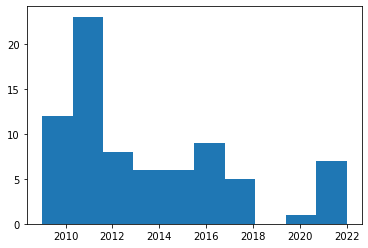

In [22]:
import matplotlib.pyplot as plt

plt.hist(dff['anos_periodo'])
plt.show()

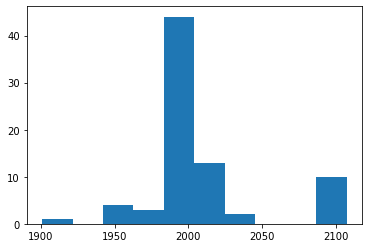

In [23]:
plt.hist(dff['anos_data'])
plt.show()


In [24]:
u=((anos_data-anos_periodo)==0).sum()
print("Temos que em %.0f porcento dos dados a direferença entre ano da data e ano do período é zero."%(u*100/df_tratado.shape[0]))

Temos que em 99 porcento dos dados a direferença entre ano da data e ano do período é zero.


In [25]:
where_years_out=np.where(anos_fora_bool)[0]
corrected_dates=[]

In [26]:
for i in where_years_out:
        d,m,y=df_tratado['DATA'].loc[i].day,df_tratado['DATA'].loc[i].month,df_tratado['DATA'].loc[i].year
        corrected_dates.append(str(d)+'/'+str(m)+'/'+str(df_tratado['ANO'].loc[i]))
for i in range(len(where_years_out)):
        df_tratado['DATA'].loc[where_years_out[i]]=corrected_dates[i]
        
df_tratado['DATA']=pd.to_datetime(df_tratado['DATA'])


In [27]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312597 entries, 0 to 312596
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ANO                312597 non-null  int64         
 1   MES                312597 non-null  int64         
 2   SENADOR            312597 non-null  object        
 3   TIPO_DESPESA       312597 non-null  object        
 4   CNPJ_CPF           309453 non-null  object        
 5   FORNECEDOR         309453 non-null  object        
 6   DOCUMENTO          288099 non-null  object        
 7   DATA               312597 non-null  datetime64[ns]
 8   DETALHAMENTO       177658 non-null  object        
 9   VALOR_REEMBOLSADO  312597 non-null  object        
 10  COD_DOCUMENTO      312597 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 26.2+ MB


Agora vamos concatenar as colunas 'ANO' e 'MES' na coluna 'PERIODO'

In [28]:
ano_mes=pd.to_datetime(df_tratado.ANO.astype(str) + '/' + df_tratado.MES.astype(str) ).dt.to_period('M')
df_tratado.insert(0,'PERIODO',ano_mes)
df_tratado.tail()

,PERIODO,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
312592,2022-08,2022,8,ZEQUINHA MARINHO,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,EQUATORIAL ENERGIA,018516578,2022-08-08,NaN,"292,59",2.18679e+06
312593,2022-08,2022,8,ZEQUINHA MARINHO,"Aluguel de imóveis para escritório político, c...",04.895.728/0001-80,EQUATORIAL ENERGIA,0202208018625090,2022-08-08,NaN,"553,33",2.18679e+06
312594,2022-08,2022,8,ZEQUINHA MARINHO,"Locomoção, hospedagem, alimentação, combustíve...",27.522.923/0001-60,Casarao da Vila Restaurante LTDA - ME,000127032,2022-03-08,NaN,"26,57",2.18489e+06
312595,2022-08,2022,8,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,FLXNAO,2022-02-08,"Companhia Aérea: GOL, Localizador: FLXNAO. Pas...","3140,46",2.18543e+06
312596,2022-08,2022,8,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,TKR98A,2022-07-08,"Companhia Aérea: AZUL, Localizador: TKR98A. Pa...","2850,9",2.18543e+06


### Limpando a coluna VALOR_REEMBOLSADO

Outra informação importante que tiramos do data frame usando o método `df.info()` é que a coluna VALOR_REEMBOLSADO não está sendo lida como sendo de um tipo numérico, mas sim como sendo do tipo object. Portanto, vamos converter a coluna VALOR_REEMBOLSADO para valor numérico da seguinte maneira:

In [29]:
valor_remb=pd.to_numeric(df_tratado['VALOR_REEMBOLSADO'].str.replace(',','.'), errors='coerce')
where_is_na=np.where(valor_remb.isna())[0]

print("Temos que %d de %d valores não foram convertidos para numero."%(len(where_is_na),df_tratado.shape[0]))

Temos que 1 de 312597 valores não foram convertidos para numero.


In [30]:
print(where_is_na)
df_tratado.loc[where_is_na[0]]

[115962]


PERIODO                                                        2013-02
ANO                                                               2013
MES                                                                  2
SENADOR                                                RICARDO FERRAÇO
TIPO_DESPESA         Passagens aéreas, aquáticas e terrestres nacio...
CNPJ_CPF                                            02.012.862/0001-60
FORNECEDOR                                                         TAM
DOCUMENTO                                                9572462859757
DATA                                               2013-04-02 00:00:00
DETALHAMENTO         CNPJ: 02.012.862/0001-60 FORNECEDOR: TAM DOCUM...
VALOR_REEMBOLSADO                                          1\r\n675,55
COD_DOCUMENTO                                                   698982
Name: 115962, dtype: object

In [31]:
valor_remb[where_is_na[0]]=675.55
df_tratado['VALOR_REEMBOLSADO']=valor_remb
df_tratado['VALOR_REEMBOLSADO'].describe()

count    312597.000000
mean       1005.278140
std        2561.660456
min       -1500.000000
25%         100.000000
50%         280.000000
75%         994.080000
max      270000.000000
Name: VALOR_REEMBOLSADO, dtype: float64

O método `describe()` revelou que há valores negativos na coluna 'VALOR_REEMBOLSADO'. Portanto vamos investigar esses valores e o que podemos fazer sobre isso.

In [32]:
negativos=np.where(valor_remb<0)[0]
print("A coluna 'VALOR_REEMBOLSADO' apresentou %d valores negativos"%(len(negativos)),'\n')

A coluna 'VALOR_REEMBOLSADO' apresentou 3 valores negativos 



Como exitem poucos valores negativos, vamos olhá-los individualmente.

In [33]:
for i in negativos:
    print(df.loc[i],'\n')

ANO                                                               2015
MES                                                                  2
SENADOR                                                 GLADSON CAMELI
TIPO_DESPESA         Aluguel de imóveis para escritório político, c...
CNPJ_CPF                                            63.600.449/0001-00
FORNECEDOR           Arras Adm. de Bens Imóveis Limpeza e Conservaç...
DOCUMENTO                                                          NaN
DATA                                                        15/01/2015
DETALHAMENTO         Contrato de locação de Imóvel comercial do esc...
VALOR_REEMBOLSADO                                                -1500
COD_DOCUMENTO                                              2.00123e+06
Name: 152315, dtype: object 

ANO                                                               2015
MES                                                                  1
SENADOR                                        

In [34]:
for i in negativos:
    print(df['DETALHAMENTO'].loc[i],'\n')
    

Contrato de locação de Imóvel comercial do escritório de apoio do Senador Gladson Cameli no Estado 

9572100929351 - R$ 1.298,93 (1º bilhete emitido) 9572102224403 - R$ 1.418,93 (1ª remarcação) 9572104023443 - R$ 1.498,93 (2ª remarcação) 9572104373256 - R$ 2.412,03 (3ª remarcação - bilhete utilizado) 

Despesa com Monitoramento de Informação Jornalística em Mídia Eletrônica e Imprensa 



Como não conseguimos inferir um novo número para essas linhas iremos excluí-las.

In [35]:
df_tratado=df_tratado.drop(index=negativos).reset_index()

Agora vamos verificar as correções feitas usando o método `info()`.

In [36]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312594 entries, 0 to 312593
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              312594 non-null  int64         
 1   PERIODO            312594 non-null  period[M]     
 2   ANO                312594 non-null  int64         
 3   MES                312594 non-null  int64         
 4   SENADOR            312594 non-null  object        
 5   TIPO_DESPESA       312594 non-null  object        
 6   CNPJ_CPF           309450 non-null  object        
 7   FORNECEDOR         309450 non-null  object        
 8   DOCUMENTO          288097 non-null  object        
 9   DATA               312594 non-null  datetime64[ns]
 10  DETALHAMENTO       177655 non-null  object        
 11  VALOR_REEMBOLSADO  312594 non-null  float64       
 12  COD_DOCUMENTO      312594 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), 

### Transformando a coluna DOCUMENTO em dados booleanos
Vamos transformar a coluna DOCUMENTO em dados booleanos, de modo que o valor True representa a situação em que o senador incluiu o documento e o False representa que o senador não o incluiu.

In [37]:
df_tratado['DOCUMENTO']=pd.to_numeric(df_tratado['DOCUMENTO'].isna()==False)
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312594 entries, 0 to 312593
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              312594 non-null  int64         
 1   PERIODO            312594 non-null  period[M]     
 2   ANO                312594 non-null  int64         
 3   MES                312594 non-null  int64         
 4   SENADOR            312594 non-null  object        
 5   TIPO_DESPESA       312594 non-null  object        
 6   CNPJ_CPF           309450 non-null  object        
 7   FORNECEDOR         309450 non-null  object        
 8   DOCUMENTO          312594 non-null  bool          
 9   DATA               312594 non-null  datetime64[ns]
 10  DETALHAMENTO       177655 non-null  object        
 11  VALOR_REEMBOLSADO  312594 non-null  float64       
 12  COD_DOCUMENTO      312594 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), i

### Convertendo variáveis categóricas em variáveis dummies da coluna TIPO_DESPESA	

Convertendo variáveis categóricas em variáveis dummies conseguimos gerar novas colunas com informações  sobre os tipos de despesa que podem ser analisadas.

In [38]:
dummies=pd.get_dummies(df_tratado['TIPO_DESPESA'])
col=dummies.columns
dummies=pd.get_dummies(df_tratado['TIPO_DESPESA'])
dummies.head(2)

,"Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.","Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos.","Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar",Divulgação da atividade parlamentar,"Locomoção, hospedagem, alimentação, combustíveis e lubrificantes","Passagens aéreas, aquáticas e terrestres nacionais",Serviços de Segurança Privada
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0


Como os nomes das colunas estão muito extensos, farei um dicionário para esses nomes da seguinte maneira:
 
* **DESPESA_0**: Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.
* **DESPESA_1**: Aquisição de material de consumo para uso no escritório político, inclusive aquisição ou locação de software, despesas postais, aquisição de publicações, locação de móveis e de equipamentos. 
* **DESPESA_2**: Contratação de consultorias, assessorias, pesquisas, trabalhos técnicos e outros serviços de apoio ao exercício do mandato parlamentar
* **DESPESA_3**: Divulgação da atividade parlamentar
* **DESPESA_4**: Locomoção, hospedagem, alimentação, combustíveis e lubrificantes
* **DESPESA_5**: Passagens aéreas, aquáticas e terrestres nacionais
* **DESPESA_6**: Serviços de Segurança Privada

In [39]:
dict_col={}
for i in range(len(col)):
    dict_col[col[i]]='DESPESA_'+str(i)
dummies=dummies.rename(columns=dict_col)
dummies.head(2)

,DESPESA_0,DESPESA_1,DESPESA_2,DESPESA_3,DESPESA_4,DESPESA_5,DESPESA_6
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0


In [40]:
df_tratado=pd.concat([df_tratado,dummies],axis=1)
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312594 entries, 0 to 312593
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              312594 non-null  int64         
 1   PERIODO            312594 non-null  period[M]     
 2   ANO                312594 non-null  int64         
 3   MES                312594 non-null  int64         
 4   SENADOR            312594 non-null  object        
 5   TIPO_DESPESA       312594 non-null  object        
 6   CNPJ_CPF           309450 non-null  object        
 7   FORNECEDOR         309450 non-null  object        
 8   DOCUMENTO          312594 non-null  bool          
 9   DATA               312594 non-null  datetime64[ns]
 10  DETALHAMENTO       177655 non-null  object        
 11  VALOR_REEMBOLSADO  312594 non-null  float64       
 12  COD_DOCUMENTO      312594 non-null  object        
 13  DESPESA_0          312594 non-null  uint8   

### Removendo as colunas que não participarão da análise dos dados
* **'ANO' e 'MES'**
    - As colunas 'ANO' e 'MES' foram concatenadas na colunas 'PERIODO'

* **'DETALHAMENTO'**
    - A coluna 'DETALHAMENTO' te muitos valores ausentes e não será usada nas análises.
    
* **'COD_DOCUMENTO'**
    - A coluna 'COD_DOCUMENTO' possuem informação que não serão úteis nas análises.
    
* **'CNPJ_CPF' e 'FORNECEDOR'**
    - Como vimos, quando estavamos explorando os dados, as colunas 'CNPJ_CPF', 'FORNECEDOR' e 'DATA' não apareceram apenas em 2008 e em parte de 2009, de modo que não seria interessante transformar os dados 'CNPJ_CPF' e 'FORNECEDOR' em dados booleanos. 
 
* **'TIPO_DESPESA'**
    - A coluna 'TIPO_DESPESA' não é mais necessária pois foi transformada em colunas com variáveis dummy.

In [41]:
remove_columns=['ANO','MES','DETALHAMENTO','COD_DOCUMENTO','CNPJ_CPF','FORNECEDOR','TIPO_DESPESA']
df_tratado=df_tratado.drop(remove_columns,axis=1)

In [42]:
df_tratado.head(2)

,index,PERIODO,SENADOR,DOCUMENTO,DATA,VALOR_REEMBOLSADO,DESPESA_0,DESPESA_1,DESPESA_2,DESPESA_3,DESPESA_4,DESPESA_5,DESPESA_6
0,0,2008-09,ADA MELLO,False,2008-09-01,12351.52,0,0,1,0,0,0,0
1,1,2008-09,ADA MELLO,False,2008-09-01,386.60,0,0,0,0,1,0,0


In [43]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312594 entries, 0 to 312593
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              312594 non-null  int64         
 1   PERIODO            312594 non-null  period[M]     
 2   SENADOR            312594 non-null  object        
 3   DOCUMENTO          312594 non-null  bool          
 4   DATA               312594 non-null  datetime64[ns]
 5   VALOR_REEMBOLSADO  312594 non-null  float64       
 6   DESPESA_0          312594 non-null  uint8         
 7   DESPESA_1          312594 non-null  uint8         
 8   DESPESA_2          312594 non-null  uint8         
 9   DESPESA_3          312594 non-null  uint8         
 10  DESPESA_4          312594 non-null  uint8         
 11  DESPESA_5          312594 non-null  uint8         
 12  DESPESA_6          312594 non-null  uint8         
dtypes: bool(1), datetime64[ns](1), float64(1), i

Agora temos nossos dados limpos e prontos para análises!

## Análise dos dados

In [44]:
#df_tratado_senador=df_tratado.drop('index',axis=1).groupby('SENADOR').sum()#describe().loc[:,(slice(None),'max')]
#df_tratado_senador.head(2)

### Séries temporais - Modelo Arima


In [45]:
df_arima=df_tratado[['PERIODO','VALOR_REEMBOLSADO']]
df_arima=df_arima[df_tratado['PERIODO']<'2022-08-02']#.groupby('DATA').sum()
df_arima=df_arima[df_tratado['PERIODO']>='2010-01-01'].groupby('PERIODO').sum()
df_arima

,VALOR_REEMBOLSADO
PERIODO,
2010-01,797009.90
2010-02,836040.72
2010-03,1077340.24
2010-04,900934.90
2010-05,897544.91
...,...
2022-03,2678668.99
2022-04,2334118.46
2022-05,2466599.08


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
datas=[(str(x.year)+'-'+('%02d'%(x.month)) ) for x in df_arima.index]
len(datas)
np.arange(1,151,2)

array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97,  99, 101, 103,
       105, 107, 109, 111, 113, 115, 117, 119, 121, 123, 125, 127, 129,
       131, 133, 135, 137, 139, 141, 143, 145, 147, 149])

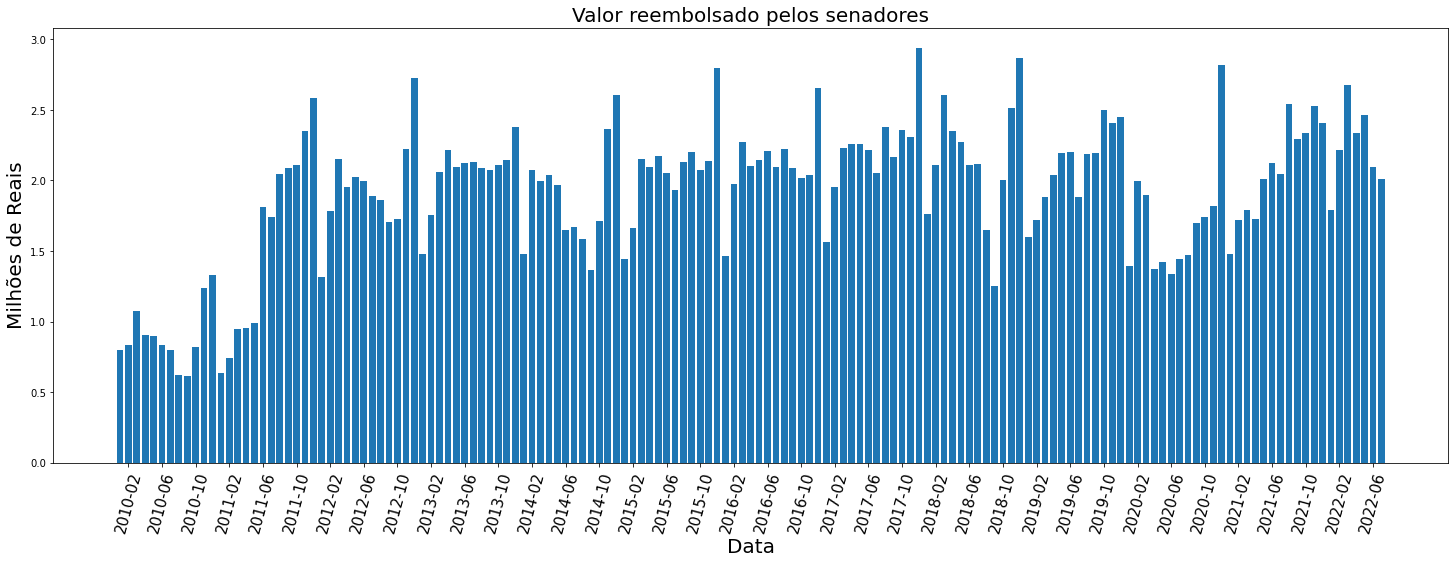

In [91]:
plt.figure(figsize=(25,8))
fig = plt.bar(datas,df_arima.VALOR_REEMBOLSADO/10**6)
plt.title("Valor reembolsado pelos senadores", size = 20)
plt.xlabel("Data",size=20)
plt.ylabel('Milhões de Reais',size=20)
plt.xticks(np.arange(1,len(datas),4),rotation=75,size=15)
plt.show()

In [48]:
mes=df_arima.reset_index()['PERIODO'].dt.month
np.unique(mes)


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

Text(0.5, 1.0, 'Valor reembolsado pelos senadores em cada mes \n considerando os anos --')

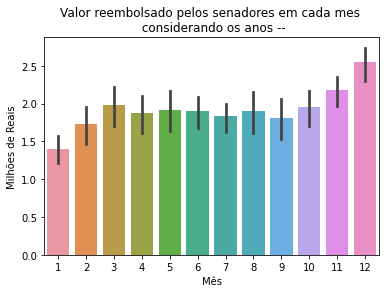

In [76]:
sns.barplot(x=df_arima.index.month,y=df_arima.VALOR_REEMBOLSADO.values/10**6)
plt.xlabel('Mês')
plt.ylabel('Milhões de Reais')
plt.title('Valor reembolsado pelos senadores em cada mês \n considerando os anos --')



In [50]:
 # isso permite que a gente decomponha em tendencia, sazionalidade,ruido
from statsmodels.tsa.seasonal import seasonal_decompose
# permite que a gente plot isso
from statsmodels.tsa.seasonal import STL

In [51]:
y

2002

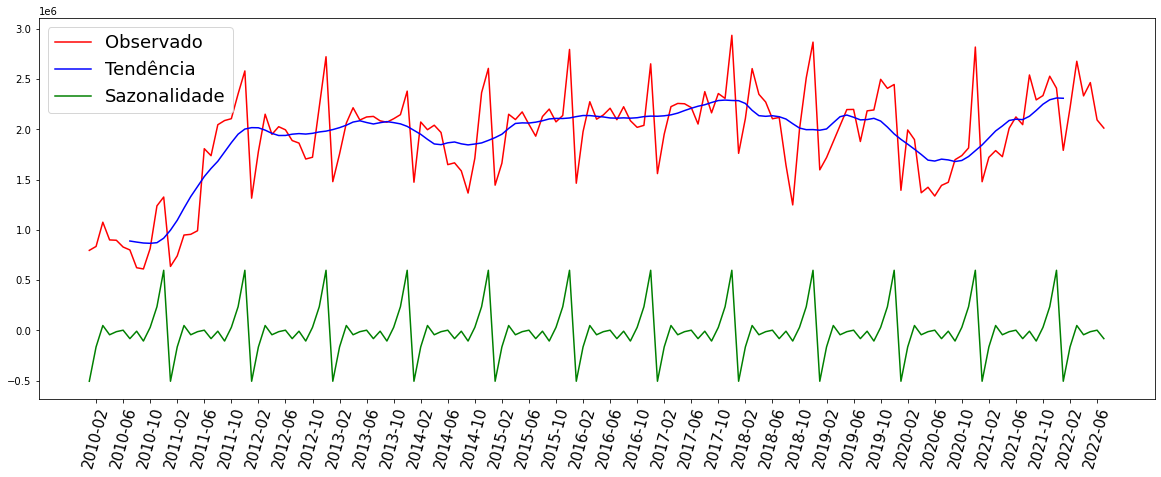

In [93]:
def plotar(datas,y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(datas,y1.values,color=cor1,label=label1)
    plt.plot(datas,y2.values,color=cor2,label=label2)
    plt.plot(datas,y3.values,color=cor3,label=label3)
    plt.legend(fontsize=18)
    plt.xticks(np.arange(1,len(datas),4),rotation=75,size=15)
    plt.show()
    
resultados = seasonal_decompose(df_arima.VALOR_REEMBOLSADO, freq = 12)
resultados
plotar(datas,resultados.observed, resultados.trend, resultados.seasonal, 'red','blue','green'
       ,'Observado','Tendência','Sazonalidade')

#### Diferenciação e ACF

In [53]:
y = df_arima['VALOR_REEMBOLSADO']
y.head()

PERIODO
2010-01     797009.90
2010-02     836040.72
2010-03    1077340.24
2010-04     900934.90
2010-05     897544.91
Freq: M, Name: VALOR_REEMBOLSADO, dtype: float64

In [54]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(y.dropna()))
print('p-valor:',adfuller(y.dropna())[1] )

(-4.098343182337002, 0.0009746499380548317, 12, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3801.5401570361273)
p-valor: 0.0009746499380548317


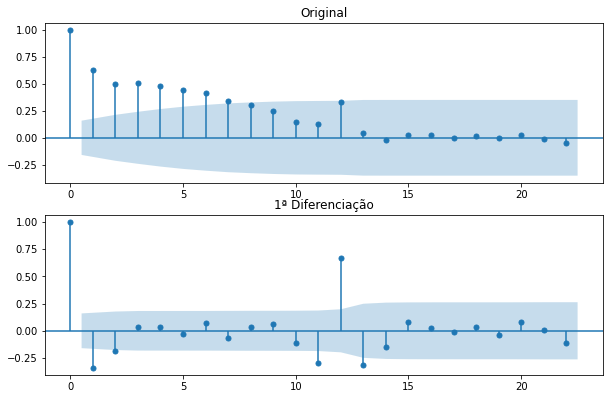

In [55]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
def plotarACF(y1,y2):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)#3 linhas, 1 coluna, graph 1
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)#3 linhas, 1 coluna, graph 2
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    plt.show()
plotarACF(y,y.diff().dropna())

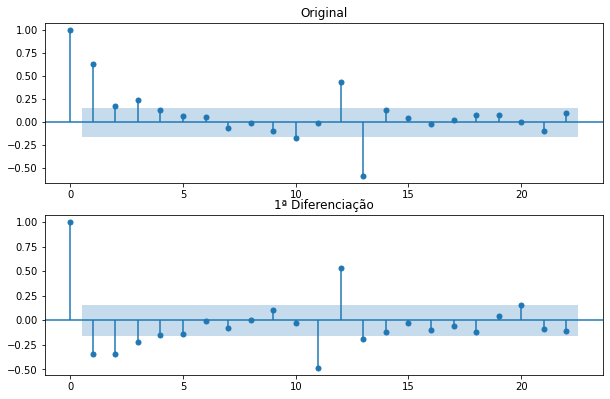

In [56]:
def plotarPACF(y1,y2):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)#3 linhas, 1 coluna, graph 1
    fig = plot_pacf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)#3 linhas, 1 coluna, graph 2
    fig = plot_pacf(y2,ax=ax2,title='1ª Diferenciação')
    plt.show()
plotarPACF(y,y.diff().dropna());#ponto e virgula para aparece apenas um resultado

In [57]:
y = df_arima['VALOR_REEMBOLSADO']
y

PERIODO
2010-01     797009.90
2010-02     836040.72
2010-03    1077340.24
2010-04     900934.90
2010-05     897544.91
              ...    
2022-03    2678668.99
2022-04    2334118.46
2022-05    2466599.08
2022-06    2094922.43
2022-07    2013869.35
Freq: M, Name: VALOR_REEMBOLSADO, Length: 151, dtype: float64

#### Prevendo o futuro

Separando o teste do treino

In [58]:
import itertools
p=d=q=range(0,2)
pdq = list(itertools.product(p, d, q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [59]:
from statsmodels.tsa.arima.model import ARIMA
aic_lista = []
param_lista=[]
for param in pdq: 
    mod = ARIMA(y,order=param)
    results = mod.fit()
    aic_lista.append(results.aic)
    param_lista.append(param)
    
param_lista[aic_lista.index(min(aic_lista))]

(1, 1, 1)

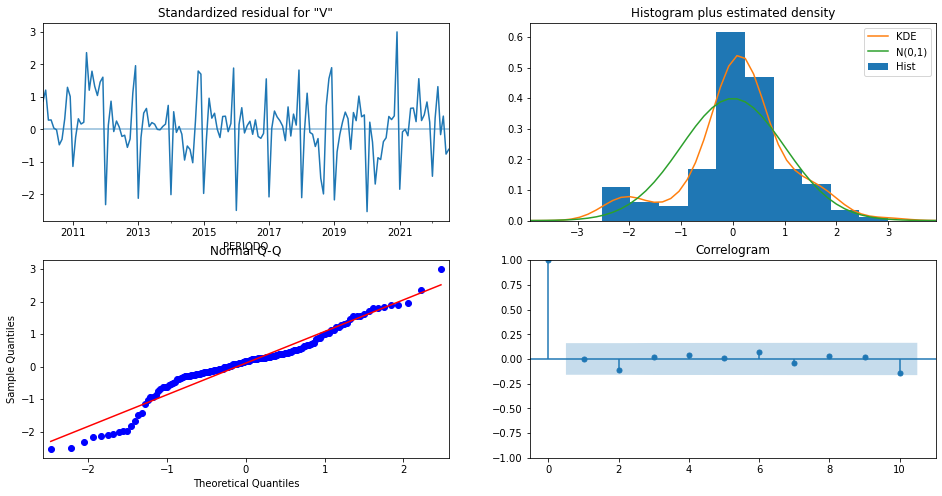

In [60]:

mod = ARIMA(y,order=(1,1,1))#,freq='D')
results = mod.fit()
results.plot_diagnostics(figsize=(16,8))
plt.show()

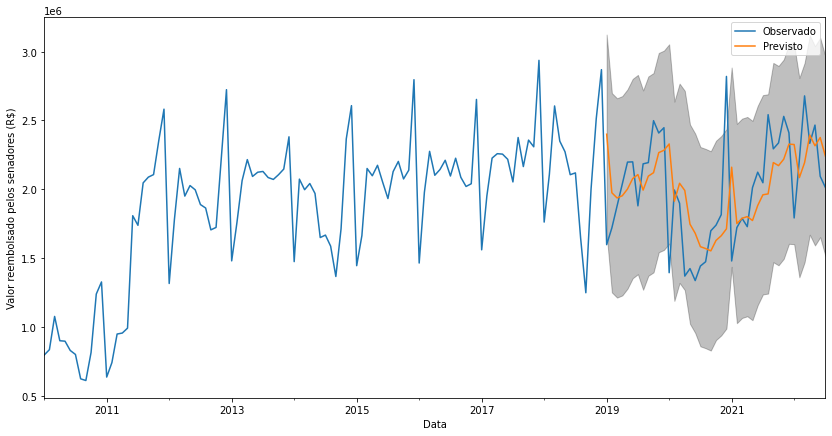

In [92]:
pred=results.get_prediction(start=pd.to_datetime('2019-01-19'),dynamic=False)
#intervalo de confiança
pred_ic= pred.conf_int()

ax=y.plot(label='Observado', figsize=(14,7))
pred.predicted_mean.plot(ax=ax, label='Previsto')
ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Valor reembolsado pelos senadores (R$)')
plt.legend()
plt.show()


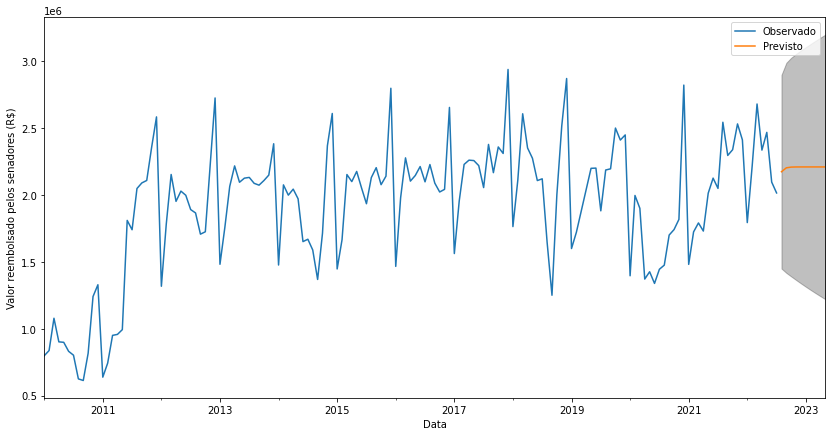

In [62]:
pred_uc = results.get_forecast(steps=10)
pred_ic = pred_uc.conf_int()
ax=y.plot(label='Observado', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Previsto')

ax.fill_between(pred_ic.index, pred_ic.iloc[:,0], pred_ic.iloc[:,1], color='k', alpha=0.25)
ax.set_xlabel('Data')
ax.set_ylabel('Valor reembolsado pelos senadores (R$)')
plt.legend()
plt.show()

